Dans ce fichier j'entraine un modèle pour classer des images satellites
Ce code utilise un dataset d'uniquement 3 classes (Sea Lake, Annual Crop et Industrial), avec 8 500 images.

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r'/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/EuroSat_3Classes'

# Paramètres
batch_size = 32
img_height = 64
img_width = 64
validation_split = 0.2

# Création d'un ImageDataGenerator pour prétraitement
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split
)

# Générateur pour les données d'entraînement
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Générateur pour les données de validation
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6800 images belonging to 3 classes.
Found 1700 images belonging to 3 classes.


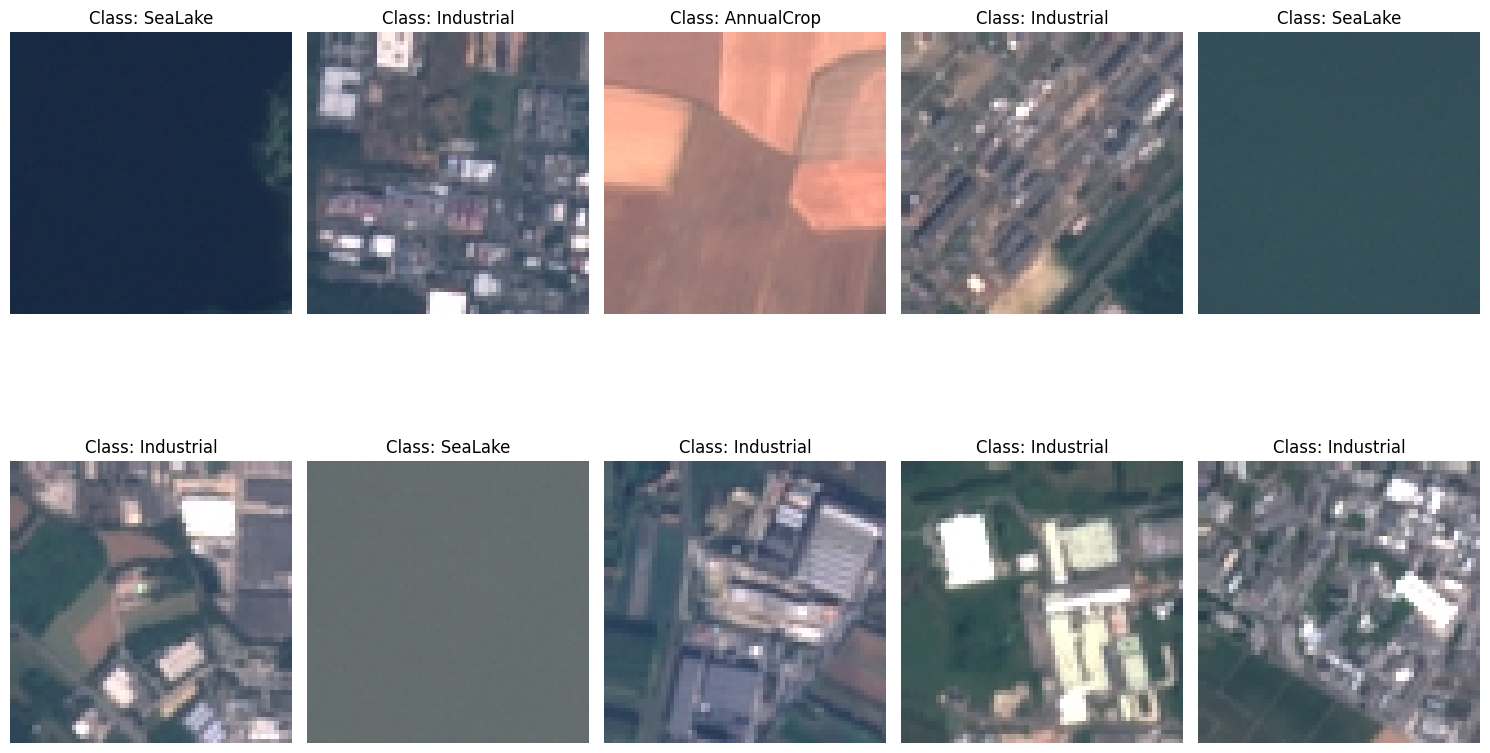

In [22]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

# Définition du nombre d'images à afficher
num_images = 10

# Création d'une figure pour afficher les images
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title('Class: ' + list(train_generator.class_indices.keys())[labels[i].argmax()])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Première couche convolutive
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    # Deuxième couche convolutive
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Troisième couche convolutive
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Flatten pour convertir les matrices 3D en 1D
    Flatten(),
    # Couches denses
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,595 (9.36 MB)

 Trainable params: 2,454,595 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.8393 - loss: 0.3640 - val_accuracy: 0.9429 - val_loss: 0.1686
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.9512 - loss: 0.1353 - val_accuracy: 0.9629 - val_loss: 0.1131
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9570 - loss: 0.1272 - val_accuracy: 0.9635 - val_loss: 0.0992
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9662 - loss: 0.0984 - val_accuracy: 0.9665 - val_loss: 0.0991
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.9745 - loss: 0.0752 - val_accuracy: 0.9641 - val_loss: 0.1001
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9686 - loss: 0.0901 - val_accuracy: 0.9688 - val_loss: 0.1050
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.9746 - loss: 0.0775 - val_accuracy: 0.9753 - val_loss: 0.0689
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.9760 - loss: 0.0613 - 

In [26]:
model.save('modele3Classes.h5')

54/54 - 1s - 24ms/step - accuracy: 0.9812 - loss: 0.0646

Test accuracy: 0.981176495552063


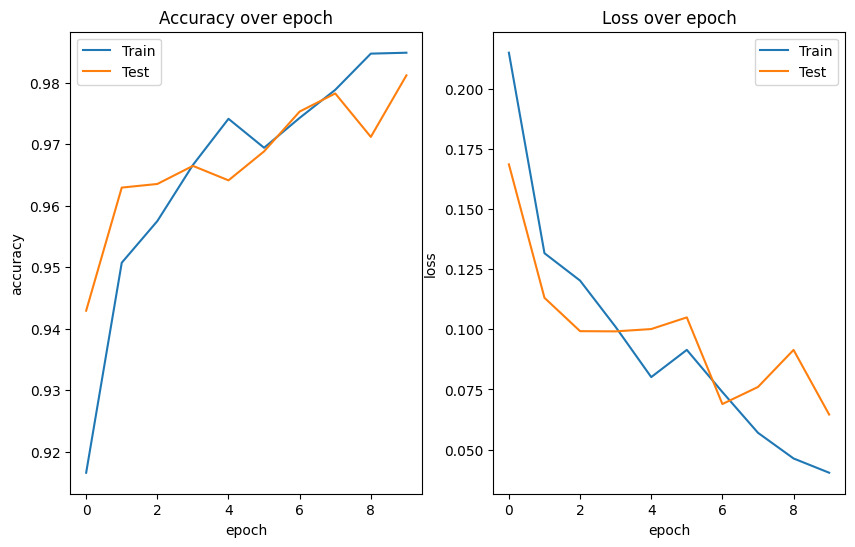

In [33]:
## visualisation

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy over epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])

ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss over epoch')
ax2.legend(['Train', 'Test'], loc="upper right")

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)



In [28]:
from tensorflow.keras.models import load_model

# Charger le modèle
model = load_model('modele3Classes.h5')

In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Fonction pour charger et préparer l'image
def load_and_prepare_image(file_path):
    img = image.load_img(file_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normaliser l'image comme nous l'avons fait avec les données d'entraînement
    img_array = np.expand_dims(img_array, axis=0)  # Créer un batch contenant une seule image
    return img_array

# Chemin vers une nouvelle image
image_path = r'/Users/alexd/Documents/etudes/M2/analyseImage/CMI/model/EuroSat_3Classes/AnnualCrop/AnnualCrop_3.jpg'

# Charger et préparer l'image
new_image = load_and_prepare_image(image_path)

# Prédire la classe de l'image
prediction = model.predict(new_image)
predicted_class = np.argmax(prediction, axis=1)
predicted_class_name = list(train_generator.class_indices.keys())[predicted_class[0]]

print("Classe prédite :", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classe prédite : AnnualCrop


In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Collecter toutes les prédictions et les vraies étiquettes
y_pred = []
y_true = []

num_images_to_process = 1000
processed_images = 0

for images, labels in validation_generator:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels, axis=1))
    processed_images += len(images)
    if processed_images >= num_images_to_process:
        break

validation_generator.reset()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

In [31]:
conf_mat = confusion_matrix(y_true, y_pred)

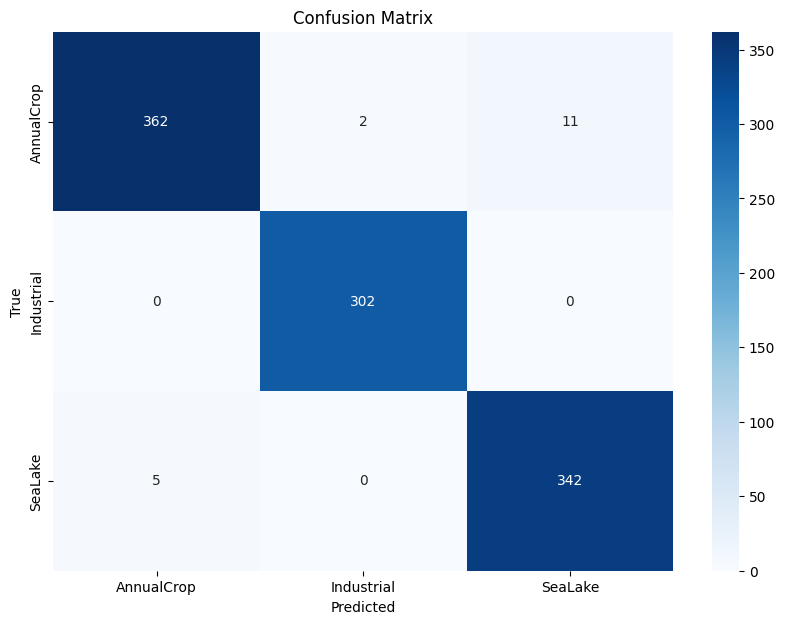

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()